# Chapter 3: Dimensionality Reduction Techniques

This notebook provides practical "recipes" for using dimensionality reduction techniques in scikit-learn. Each recipe includes explanations, code examples, visualizations, best practices, and common pitfalls.

## Principal Component Analysis (PCA)

PCA is an *unsupervised* dimensionality reduction technique that transforms high-dimensional data into a new coordinate system where the axes (principal components) are ordered by the amount of variance they explain.

### Key Concepts:
- PCA finds directions of maximum variance in the data
- Components are orthogonal to each other
- First component explains the most variance, followed by second, etc.
- Requires standardized data for optimal results

### Getting ready
To begin, we will load our toy dataset from scikit-learn. Version 1.5 of scikit-learn contains 6 datasets that are commonly used to illustrate various ML steps and features in the library. In this case, we will be using the Wine dataset.

In [2]:
# Load libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
import warnings

# Set random seed for reproducibility and suppress warnings
np.random.seed(2024)
warnings.simplefilter(action='ignore', category=FutureWarning)

#Load dataset
wine = load_wine()
df_wine = pd.DataFrame(data=wine.data, columns=wine.feature_names)
target_wine = wine.target
display(df_wine.head(10))

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0


### How to do it...

We will load some additional libraries from scikit-learn as well as Matplotlib which is a commonly used Python library for data visualization. You’ll also notice that we are using the `Pipeline()` class to string together the data scaling preprocessing step with PCA. This will be a regular convention in this book so it’s best to get comfortable with it!

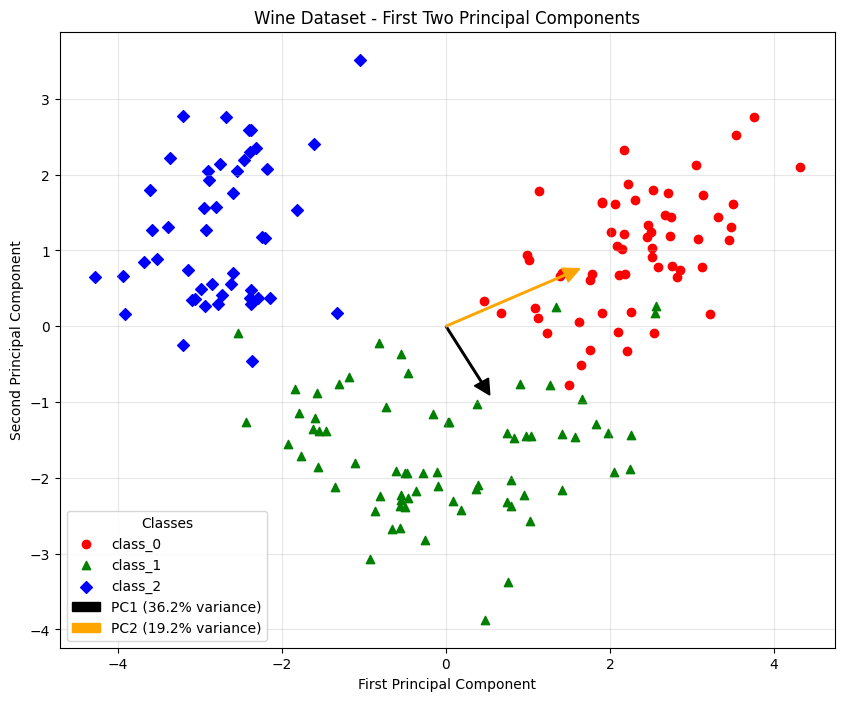

In [3]:
# Load libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Create a pipeline for PCA
pca_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Always scale before PCA
    ('pca', PCA(n_components=2))   # Reduce to 2 dimensions
])

# Fit and transform the data
X_pca = pca_pipeline.fit_transform(df_wine)

# Visualize the transformed data
plt.figure(figsize=(10, 8))
shapes = ['o', '^', 'D']
colors = ['r', 'g', 'b']

# Plot the scatter points
for i, (shape, color) in enumerate(zip(shapes, colors)):
    plt.scatter(X_pca[target_wine == i, 0], X_pca[target_wine == i, 1], 
                c=color, marker=shape, label=wine.target_names[i])

# Get the PCA components and plot as vectors
pca = pca_pipeline.named_steps['pca']
origin = np.zeros(2)  # Origin point for vectors
arrow_colors = ['black', 'orange']

# Scale the components by their explained variance ratio for better visualization
scaling = 3
for i, (component, ratio) in enumerate(zip(pca.components_, pca.explained_variance_ratio_)):
    plt.arrow(origin[0], origin[1],
              component[0] * scaling, component[1] * scaling,
              color=arrow_colors[i],
              width=0.02, head_width=0.2, head_length=0.2,
              label=f'PC{i+1} ({ratio:.1%} variance)')

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Wine Dataset - First Two Principal Components')
plt.legend(title="Classes")
plt.grid(True, alpha=0.3)
plt.show()

### How it works...

PCA works by identifying the directions (principal components) in which the data varies the most. These components are linear combinations of the original features and are orthogonal (i.e., at right angles) to each other. 

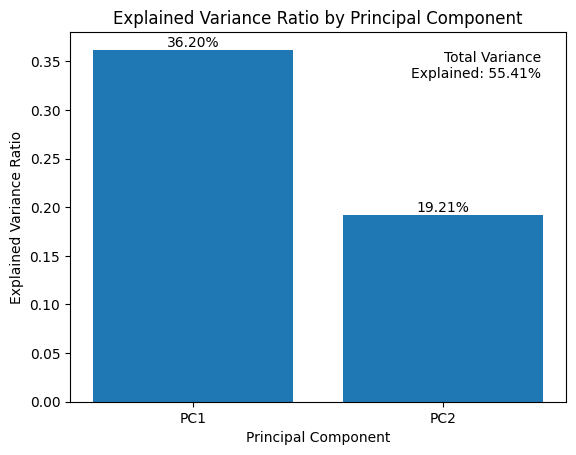

In [11]:
# Get the explained variance ratio
pca = pca_pipeline.named_steps['pca']
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate cumulative variance
cumulative_variance = np.sum(explained_variance_ratio)

# Plot barchart
fig, ax = plt.subplots()

x = np.arange(1, len(explained_variance_ratio) + 1)
y = explained_variance_ratio
bars = ax.bar(x, y)

# Add percentage labels on bars
for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                        f'{height:.2%}',
                        ha='center', va='bottom')

# Add cumulative variance text in upper right
ax.text(0.95, 0.95, f'Total Variance\nExplained: {cumulative_variance:.2%}',
                transform=ax.transAxes,
                ha='right', va='top',
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

# Set custom x-axis labels for the two principal components
ax.set_xticks(x)
ax.set_xticklabels(['PC1', 'PC2'])

ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance Ratio')
ax.set_title('Explained Variance Ratio by Principal Component')
plt.show()

1.	Top Row: Original Standardized Features. The first two scatter plots display pairs of original standardized features before PCA: "Alcohol vs. Malic Acid" on the left and "Flavanoids vs. Proanthocyanins" on the right. Each data point is color-coded by wine class (class_0, class_1, class_2), with distinct markers for each class. The distribution shows overlap and separation among classes in the raw feature space.
2.	Bottom Row: PCA-Transformed Features. The bottom row shows the same features transformed using PCA, where data is reoriented along the first two principal components (PC1 and PC2). The arrows indicate the directions of PC1 and PC2, which capture the maximum variance in the data. PCA helps to better separate the wine classes by projecting the features into a lower-dimensional space with improved class distinction.


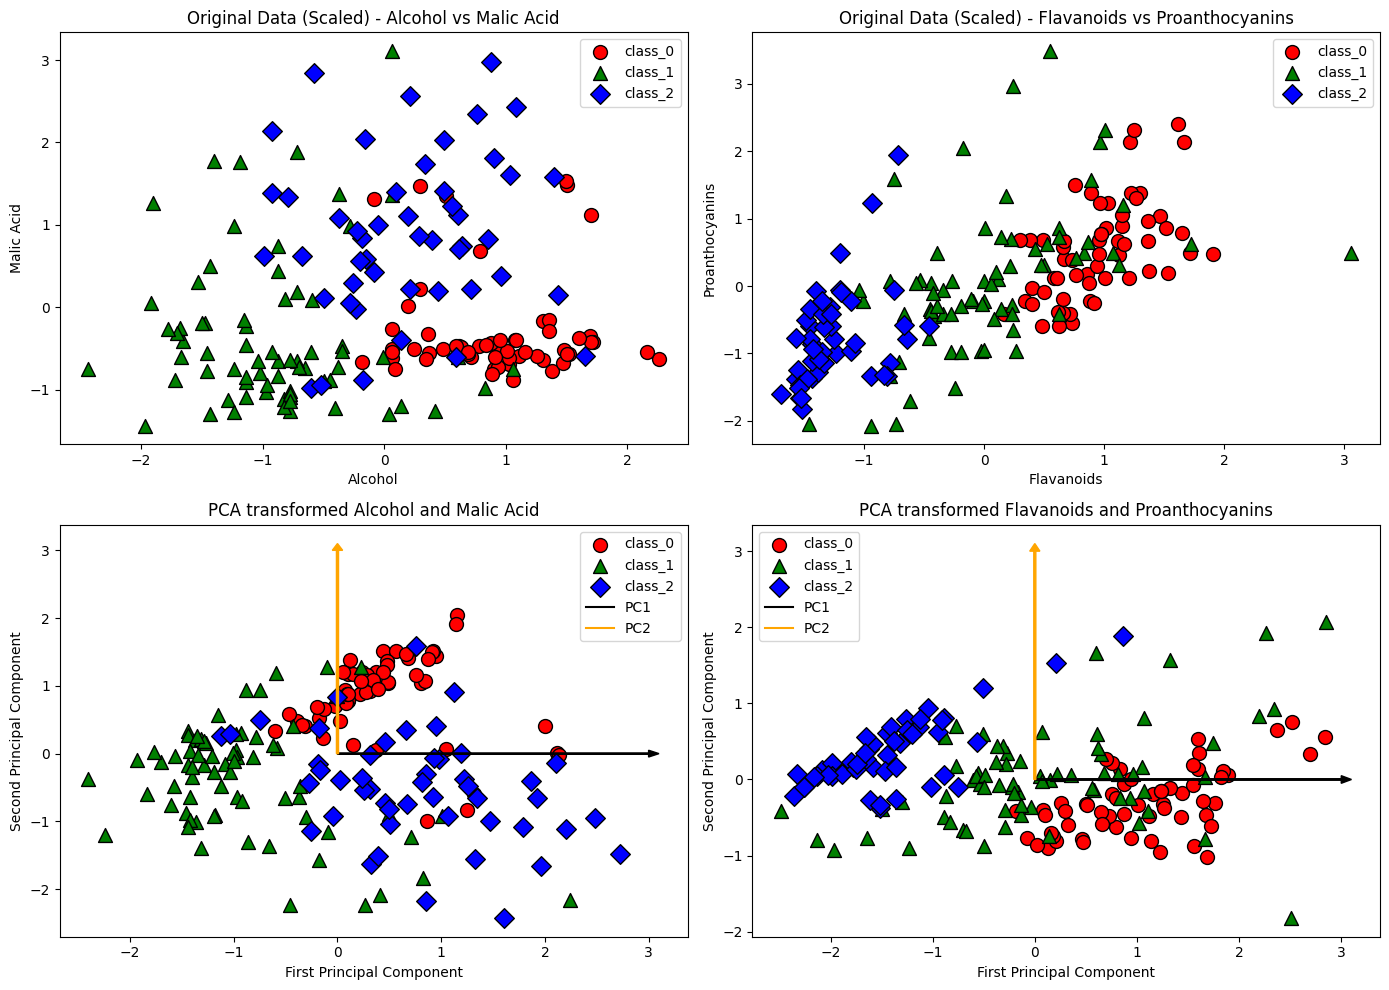

In [5]:
# Choose two features: 'alcohol' and 'malic_acid'
features_1 = ['alcohol', 'malic_acid']
df_wine_subset_1 = df_wine[features_1]
df_wine_subset_1 = pd.DataFrame(StandardScaler().fit_transform(df_wine_subset_1), columns=features_1)

# Perform PCA on the two features
pca_2d_1 = PCA(n_components=2)
X_pca_2d_1 = pca_2d_1.fit_transform(df_wine_subset_1)

# Choose two different features: 'flavanoids' and 'proanthocyanins'
features_2 = ['flavanoids', 'proanthocyanins']
df_wine_subset_2 = df_wine[features_2]
df_wine_subset_2 = pd.DataFrame(StandardScaler().fit_transform(df_wine_subset_2), columns=features_2)

# Perform PCA on the two different features
pca_2d_2 = PCA(n_components=2)
X_pca_2d_2 = pca_2d_2.fit_transform(df_wine_subset_2)

# Create a figure with four subplots in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Original data plot 1 (top left)
for i, (shape, color) in enumerate(zip(shapes, colors)):
    mask = target_wine == i
    axes[0,0].scatter(df_wine_subset_1['alcohol'][mask],
                     df_wine_subset_1['malic_acid'][mask],
                     marker=shape, c=color, edgecolor='k', s=100,
                     label=wine.target_names[i])
axes[0,0].set_xlabel('Alcohol')
axes[0,0].set_ylabel('Malic Acid')
axes[0,0].set_title('Original Data (Scaled) - Alcohol vs Malic Acid')
axes[0,0].legend()

# Original data plot 2 (top right)
for i, (shape, color) in enumerate(zip(shapes, colors)):
    mask = target_wine == i
    axes[0,1].scatter(df_wine_subset_2['flavanoids'][mask],
                     df_wine_subset_2['proanthocyanins'][mask],
                     marker=shape, c=color, edgecolor='k', s=100,
                     label=wine.target_names[i])
axes[0,1].set_xlabel('Flavanoids')
axes[0,1].set_ylabel('Proanthocyanins')
axes[0,1].set_title('Original Data (Scaled) - Flavanoids vs Proanthocyanins')
axes[0,1].legend()

# PCA plot 1 (bottom left)
for i, (shape, color) in enumerate(zip(shapes, colors)):
    mask = target_wine == i
    axes[1,0].scatter(X_pca_2d_1[mask, 0], 
                     X_pca_2d_1[mask, 1],
                     marker=shape, c=color, edgecolor='k', s=100,
                     label=wine.target_names[i])
axes[1,0].set_xlabel('First Principal Component')
axes[1,0].set_ylabel('Second Principal Component')
axes[1,0].set_title('PCA transformed Alcohol and Malic Acid')

# Plot the principal components as vectors for the first PCA plot
origin_1 = np.zeros(2)
components_1 = np.eye(2)
arrow_colors_1 = ['black', 'orange']
scaling = 3
for i, component in enumerate(components_1):
    axes[1,0].arrow(origin_1[0], origin_1[1], component[0] * scaling, component[1] * scaling,
                    color=arrow_colors_1[i], width=0.02, head_width=0.1, head_length=0.1)
    axes[1,0].plot([], [], color=arrow_colors_1[i], label=f'PC{i+1}')

axes[1,0].legend()

# PCA plot 2 (bottom right)
for i, (shape, color) in enumerate(zip(shapes, colors)):
    mask = target_wine == i
    axes[1,1].scatter(X_pca_2d_2[mask, 0],
                     X_pca_2d_2[mask, 1],
                     marker=shape, c=color, edgecolor='k', s=100,
                     label=wine.target_names[i])
axes[1,1].set_xlabel('First Principal Component')
axes[1,1].set_ylabel('Second Principal Component')
axes[1,1].set_title('PCA transformed Flavanoids and Proanthocyanins')

# Plot the principal components as vectors for the second PCA plot
origin_2 = np.zeros(2)
components_2 = np.eye(2)
for i, component in enumerate(components_2):
    axes[1,1].arrow(origin_2[0], origin_2[1], component[0] * scaling, component[1] * scaling,
                    color=arrow_colors_1[i], width=0.02, head_width=0.1, head_length=0.1)
    axes[1,1].plot([], [], color=arrow_colors_1[i], label=f'PC{i+1}')

axes[1,1].legend()

plt.tight_layout()
plt.show()

### Best Practices for PCA:
1. Always scale your data before applying PCA
2. Check explained variance ratio to determine number of components
3. Use PCA for:
   - Dimensionality reduction
   - Feature extraction
   - Data visualization
   
### Common Pitfalls:
- Not scaling data before PCA
- Using PCA when interpretability is important
- Keeping too few or too many components

## Linear Discriminant Analysis (LDA)

LDA is a *supervised* dimensionality reduction technique that finds linear combinations of features that best separate classes.

### Key Concepts:
- Maximizes class separability
- Can be used for both dimensionality reduction and classification
- Takes class labels into account (supervised)

### Getting ready
We will use the same Wine dataset used previously, so we do not have to load it again.

### How to do it...

As we saw with PCA, LDA only requires loading a single scikit-learn class to perform it on your dataset. We will also be using the `Pipeline()` class to string together our scaling prior to applying LDA.

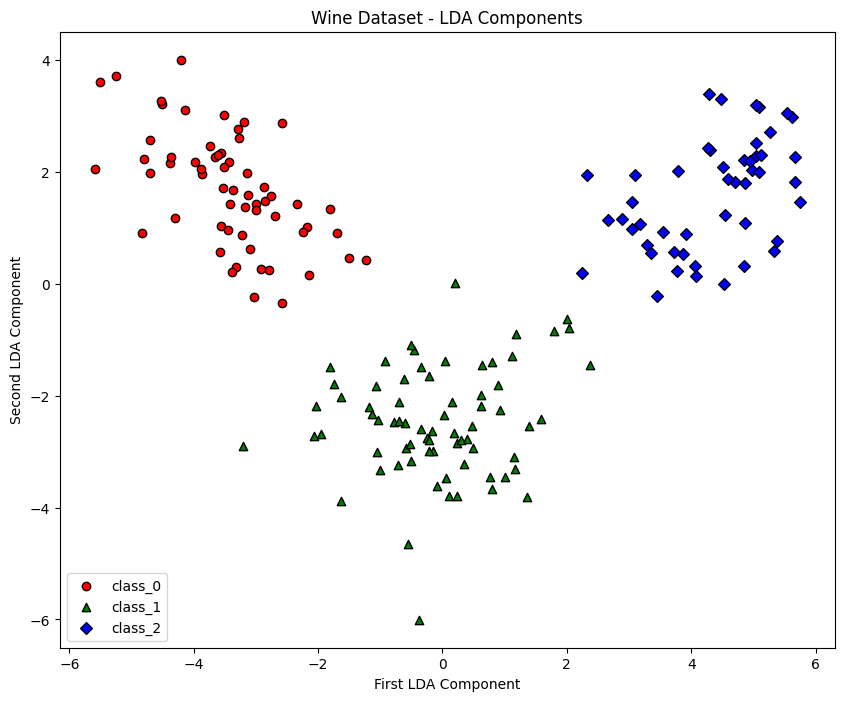

In [6]:
# Load libraries
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Split wine dataset by features and target
X_wine, y_wine = wine.data, wine.target

# Create LDA pipeline for wine dataset
lda_pipeline_wine = Pipeline([
    ('scaler', StandardScaler()),
    ('lda', LinearDiscriminantAnalysis(n_components=2))  # min(n_features, n_classes - 1) for wine dataset is 2
])

# Fit and transform the wine data
X_lda_wine = lda_pipeline_wine.fit_transform(X_wine, y_wine)

# Visualize LDA transformation for wine dataset
plt.figure(figsize=(10, 8))

# Define markers and colors for each class
shapes = ['o', '^', 'D']
colors = ['r', 'g', 'b']

# Plot each class with different marker and color
for i, (shape, color) in enumerate(zip(shapes, colors)):
    mask = y_wine == i
    plt.scatter(X_lda_wine[mask, 0], X_lda_wine[mask, 1],
               c=color, marker=shape, edgecolor='black',
               label=wine.target_names[i])

plt.xlabel('First LDA Component')
plt.ylabel('Second LDA Component')
plt.title('Wine Dataset - LDA Components')
plt.legend()
plt.show()

### How it works...

LDA is a supervised technique that seeks to find a linear combination of features that best separates two or more classes. While both PCA and LDA are used for dimensionality reduction, they have distinct objectives and methodologies. When visualized, both PCA and LDA can be similar in appearance depending on the dataset it’s applied to.

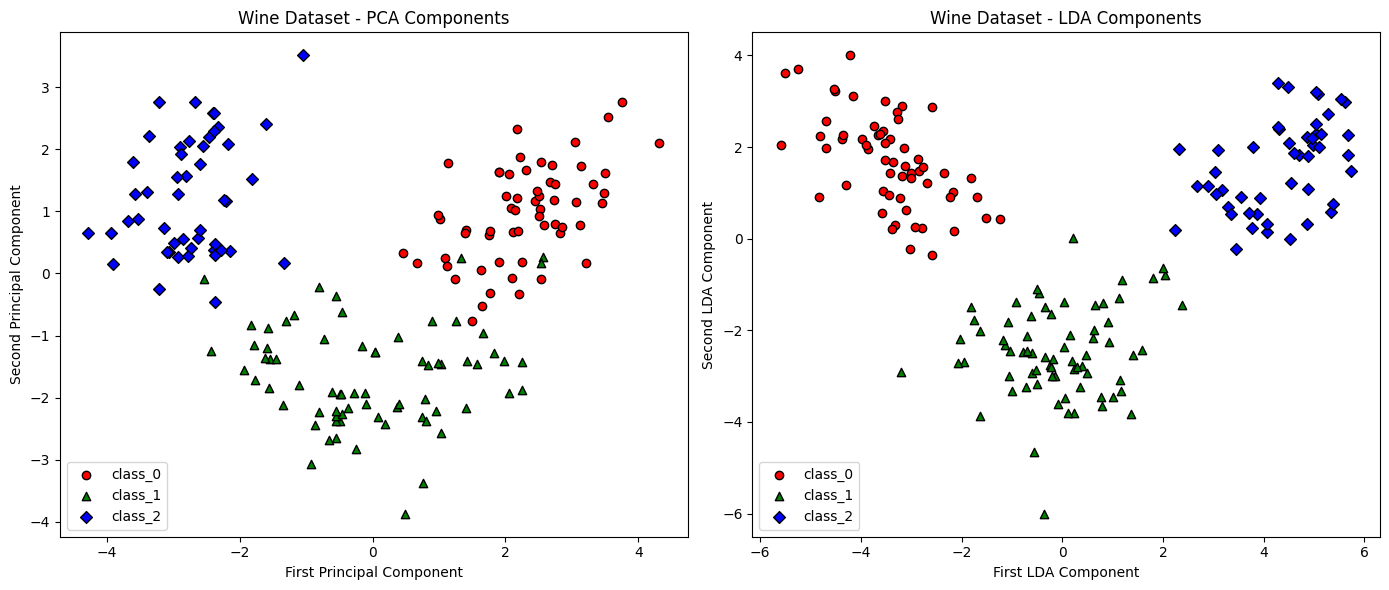

In [7]:
# Create side-by-side plots
plt.figure(figsize=(14, 6))

plt.subplot(121)
shapes = ['o', '^', 'D'] 
colors = ['r', 'g', 'b']

for i, (shape, color) in enumerate(zip(shapes, colors)):
    mask = y_wine == i
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1],
               c=color, marker=shape, edgecolor='black',
               label=wine.target_names[i])

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Wine Dataset - PCA Components')
plt.legend()

plt.subplot(122)
for i, (shape, color) in enumerate(zip(shapes, colors)):
    mask = y_wine == i
    plt.scatter(X_lda_wine[mask, 0], X_lda_wine[mask, 1],
               c=color, marker=shape, edgecolor='black',
               label=wine.target_names[i])

plt.xlabel('First LDA Component')
plt.ylabel('Second LDA Component')
plt.title('Wine Dataset - LDA Components')
plt.legend()

plt.tight_layout()
plt.show()

### Best Practices for LDA:
1. Scale features before applying LDA
2. Use when class separation is important
3. Check assumptions (normal distribution, homoscedasticity)

### Common Pitfalls:
- Using LDA with highly imbalanced classes
- Applying to non-normally distributed data
- Using when classes have very different covariance structures

## t-SNE for Data Visualization

t-SNE is a non-linear dimensionality reduction technique particularly well-suited for visualization of high-dimensional data.

### Key Concepts:
- Preserves local structure of the data
- Non-linear transformation
- Particularly good for visualization

### Getting ready
For our t-SNE demonstration, we'll be using a different dataset: another "famous" machine learning dataset called **MNIST** which consists of images of handwritten digits 0-9. From UCI Machine Learning Repository: *"We used preprocessing programs made available by NIST to extract normalized bitmaps of handwritten digits from a preprinted form. From a total of 43 people, 30 contributed to the training set and different 13 to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of 4x4 and the number of on pixels are counted in each block. This generates an input matrix of 8x8 where each element is an integer in the range 0..16. This reduces dimensionality and gives invariance to small distortions."*

In [8]:
# Load libraries
from sklearn.datasets import load_digits

# Load dataset
digits = load_digits()

### How to do it...

Again, we will use the Pipeline() class to sequentially apply data scaling prior to t-SNE.

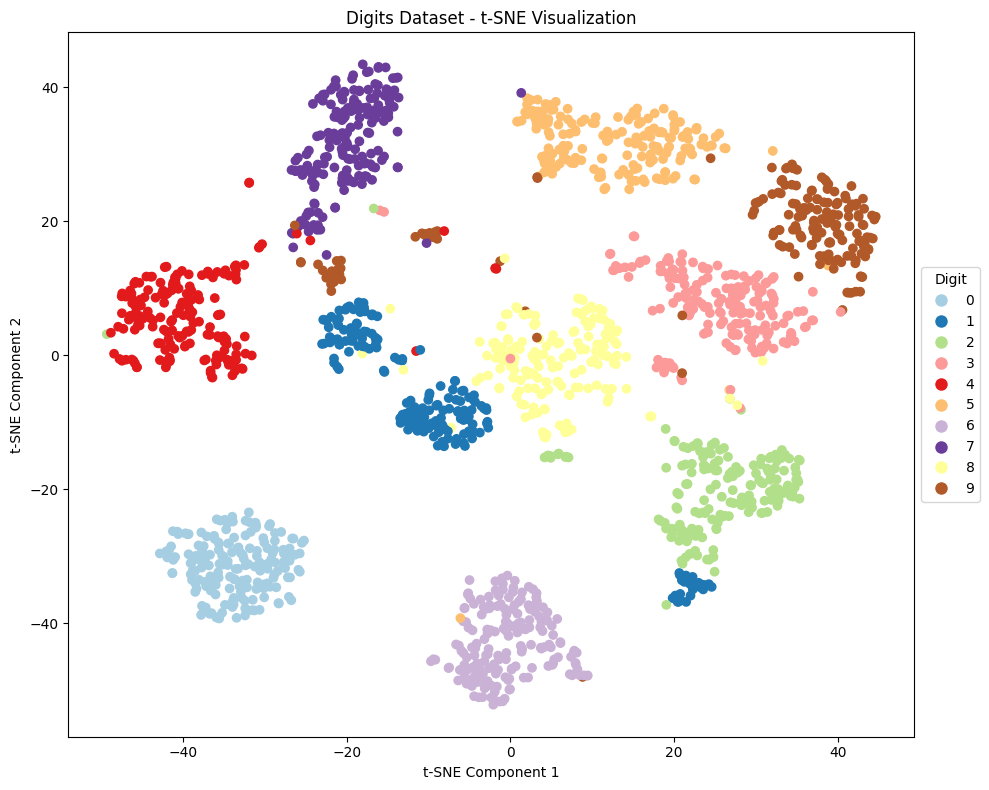

In [9]:
# Load libraries
from sklearn.manifold import TSNE

# Create t-SNE pipeline
tsne_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('tsne', TSNE(n_components=2, random_state=2024))
])

# Fit and transform the digits data
X_tsne = tsne_pipeline.fit_transform(digits.data)
# Visualize t-SNE results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=digits.target, cmap='Paired', label=digits.target)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('Digits Dataset - t-SNE Visualization')

# Create legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', 
                             markerfacecolor=plt.cm.Paired(i/9), 
                             label=str(i), markersize=10)
                  for i in range(10)]
plt.legend(handles=legend_elements, title='Digit', loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

### Best Practices for t-SNE:
1. Scale your data before applying t-SNE
2. Experiment with perplexity parameter
3. Use primarily for visualization

### Common Pitfalls:
- Using t-SNE for dimensionality reduction in a pipeline
- Over-interpreting global structure
- Not tuning perplexity parameter

## Practical Exercises on Dimensionality Reduction

### Exercise 1: PCA with Logistic Regression
Compare classification performance with and without PCA

In [10]:
# Load libraries
YOUR CODE HERE

# Split data
YOUR CODE HERE

# Pipeline without PCA
YOUR CODE HERE

# Pipeline with PCA
YOUR CODE HERE

# Fit and evaluate both pipelines
YOUR CODE HERE

# Print results
YOUR CODE HERE

SyntaxError: invalid syntax (338416831.py, line 2)

### Exercise 2: t-SNE for Clustering Visualization
Visualize how well t-SNE preserves cluster structure

In [ ]:
# Load libraries
YOUR CODE HERE

# Apply K-means clustering
YOUR CODE HERE

# Create side-by-side plots
YOUR CODE HERE

# Plot using true labels
YOUR CODE HERE

# Plot using cluster labels
YOUR CODE HERE